In [1]:
!pip install wordcloud

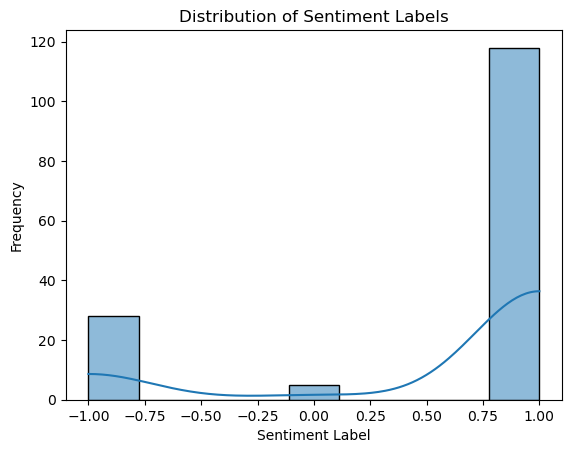

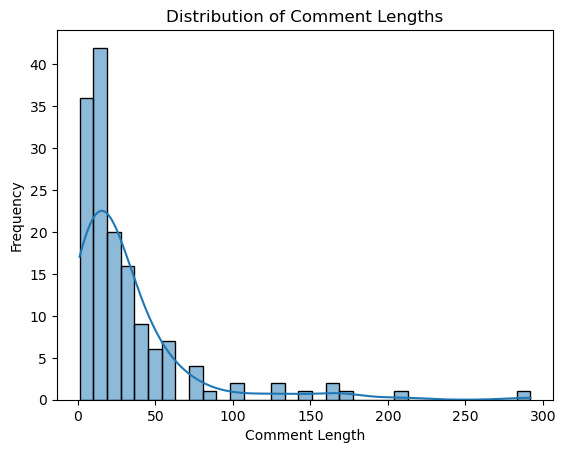

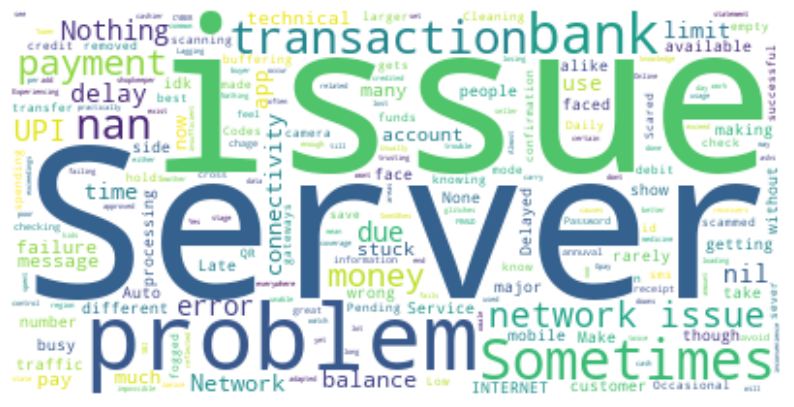

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load your Excel file
file_path = "Forms_data.xlsx"
df = pd.read_excel(file_path)

# Ensure that the 'Comment' column contains only strings
df['Comments\n'] = df['Comments\n'].astype(str)

# Preprocessing
# Create a new feature for comment length
df['comment_length'] = df['Comments\n'].apply(len)

# --- Sentiment Distribution Analysis ---
# Plot the distribution of sentiment labels
sns.histplot(df['Label'], kde=True)
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment Label")
plt.ylabel("Frequency")
plt.show()

# --- Comment Length Analysis ---
# Plot the distribution of comment lengths
sns.histplot(df['comment_length'], kde=True)
plt.title("Distribution of Comment Lengths")
plt.xlabel("Comment Length")
plt.ylabel("Frequency")
plt.show()

# --- Word Cloud of Comments ---
# Generate a word cloud based on the comments
text = " ".join(comment for comment in df['Comments\n'])
wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


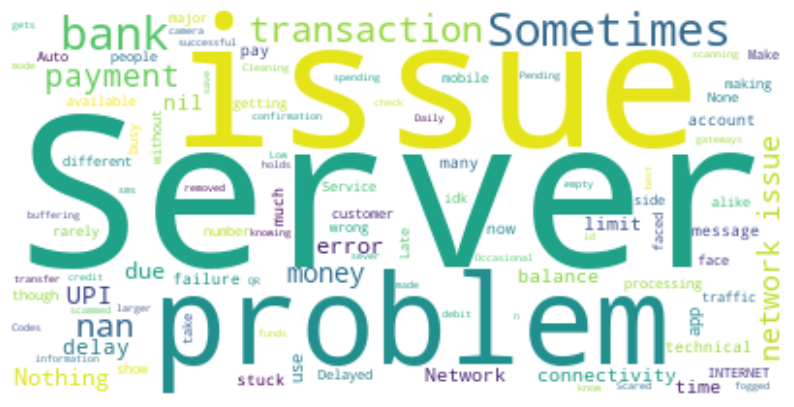

In [5]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your Excel file
file_path = "Forms_data.xlsx"
df = pd.read_excel(file_path)

# Ensure the 'Comment' column contains only strings
df['Comments\n'] = df['Comments\n'].astype(str)

# --- Word Cloud for Comment Analysis ---
# Combine all comments into a single text
text = " ".join(comment for comment in df['Comments\n'])

# Generate the word cloud with a maximum of 100 words
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
!pip install xgboost

Linear Regression - Mean Squared Error: 2.6270
Decision Tree - Mean Squared Error: 4.5580
Support Vector Machine - Mean Squared Error: 3.0940
Random Forest - Mean Squared Error: 3.3584
XGBoost - Mean Squared Error: 4.2861


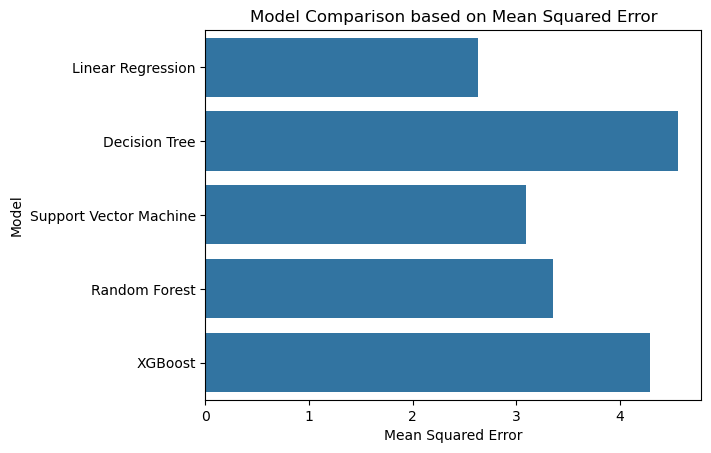

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Load your Excel file
file_path = "Forms_data.xlsx"
df = pd.read_excel(file_path)

# Ensure the 'Comment' column contains only strings
df['Comments\n'] = df['Comments\n'].astype(str)

# Create additional features (e.g., comment length)
df['comment_length'] = df['Comments\n'].apply(len)

# Select features (comment_length) and target (using 'Score' or 'Label')
# We will use 'Score' as the target (can switch to 'Label' if needed)
X = df[['comment_length']]  # Feature
y = df['score']             # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Train, predict, and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse
    print(f'{name} - Mean Squared Error: {mse:.4f}')

# Compare the results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Mean Squared Error'])

# Plot model comparison
sns.barplot(x='Mean Squared Error', y='Model', data=results_df)
plt.title("Model Comparison based on Mean Squared Error")
plt.show()

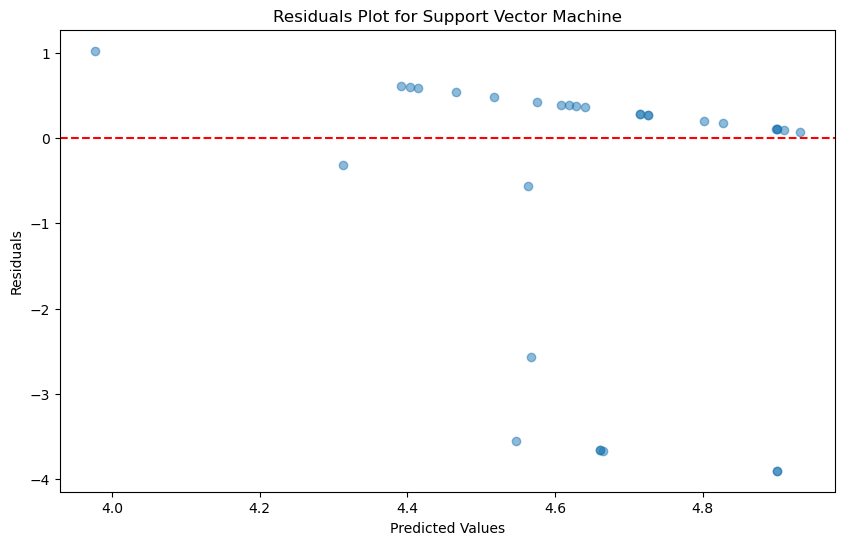

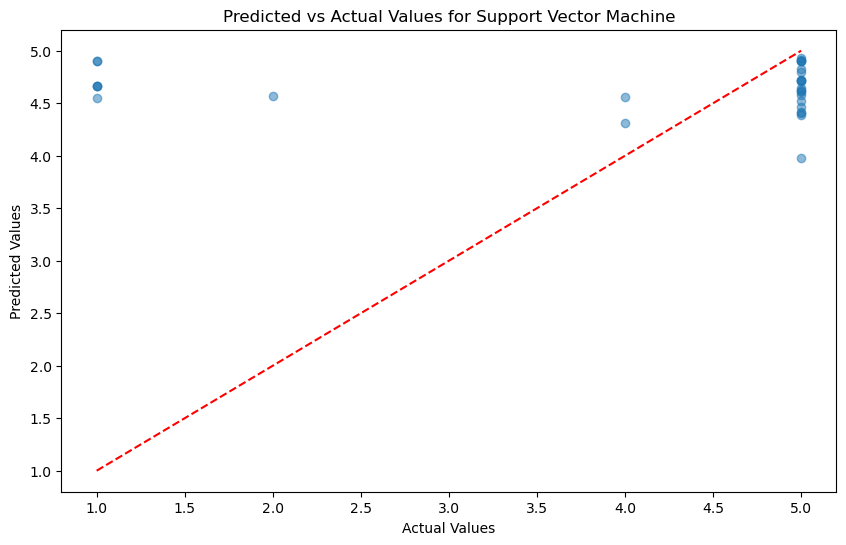

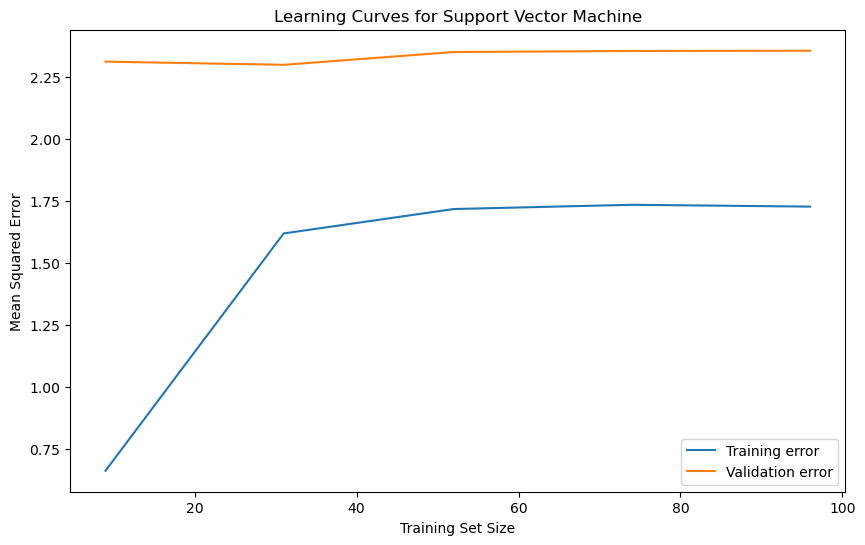

<Figure size 1000x600 with 0 Axes>

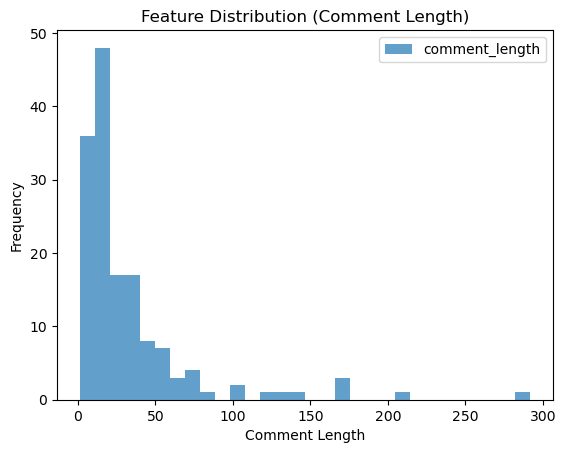

<Figure size 1000x600 with 0 Axes>

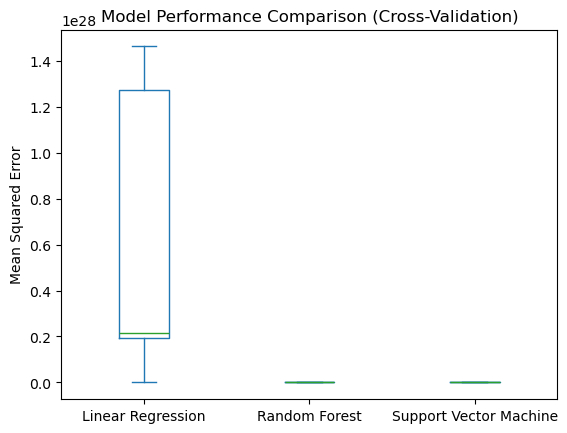

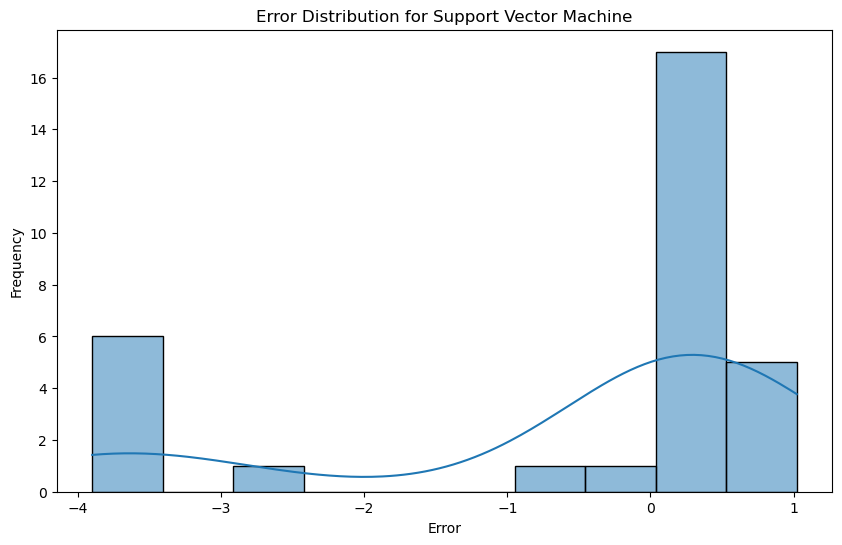

In [11]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Load the dataset (if not loaded already)
data = pd.read_excel("Forms_data.xlsx")

# Convert all entries in the 'Comment' column to string
data['Comments\n'] = data['Comments\n'].astype(str)

# Proceed with vectorizing the comments
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['Comments\n']).toarray()
y = data['score']

# Preprocess: Convert the 'Comment' to numerical features using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)  # Limiting to 1000 features for simplicity
X = vectorizer.fit_transform(data['Comments\n']).toarray()
y = data['score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()
}

# Train models and store results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    score = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    results[name] = score

# Best performing model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Predict and calculate residuals
y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot for {best_model_name}')
plt.show()

# Predicted vs Actual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Predicted vs Actual Values for {best_model_name}')
plt.show()

# Learning curves
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Training error')
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Validation error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title(f'Learning Curves for {best_model_name}')
plt.legend()
plt.show()

# Feature Distribution Plot (comment length)
data['comment_length'] = data['Comments\n'].apply(len)
plt.figure(figsize=(10, 6))
data[['comment_length']].plot(kind='hist', bins=30, alpha=0.7)
plt.xlabel('Comment Length')
plt.title('Feature Distribution (Comment Length)')
plt.show()

# Model Performance Comparison Box Plot
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_results[name] = -scores
cv_results_df = pd.DataFrame(cv_results)
plt.figure(figsize=(10, 6))
cv_results_df.plot.box()
plt.title('Model Performance Comparison (Cross-Validation)')
plt.ylabel('Mean Squared Error')
plt.show()

# Error Distribution Plot
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title(f'Error Distribution for {best_model_name}')
plt.show()


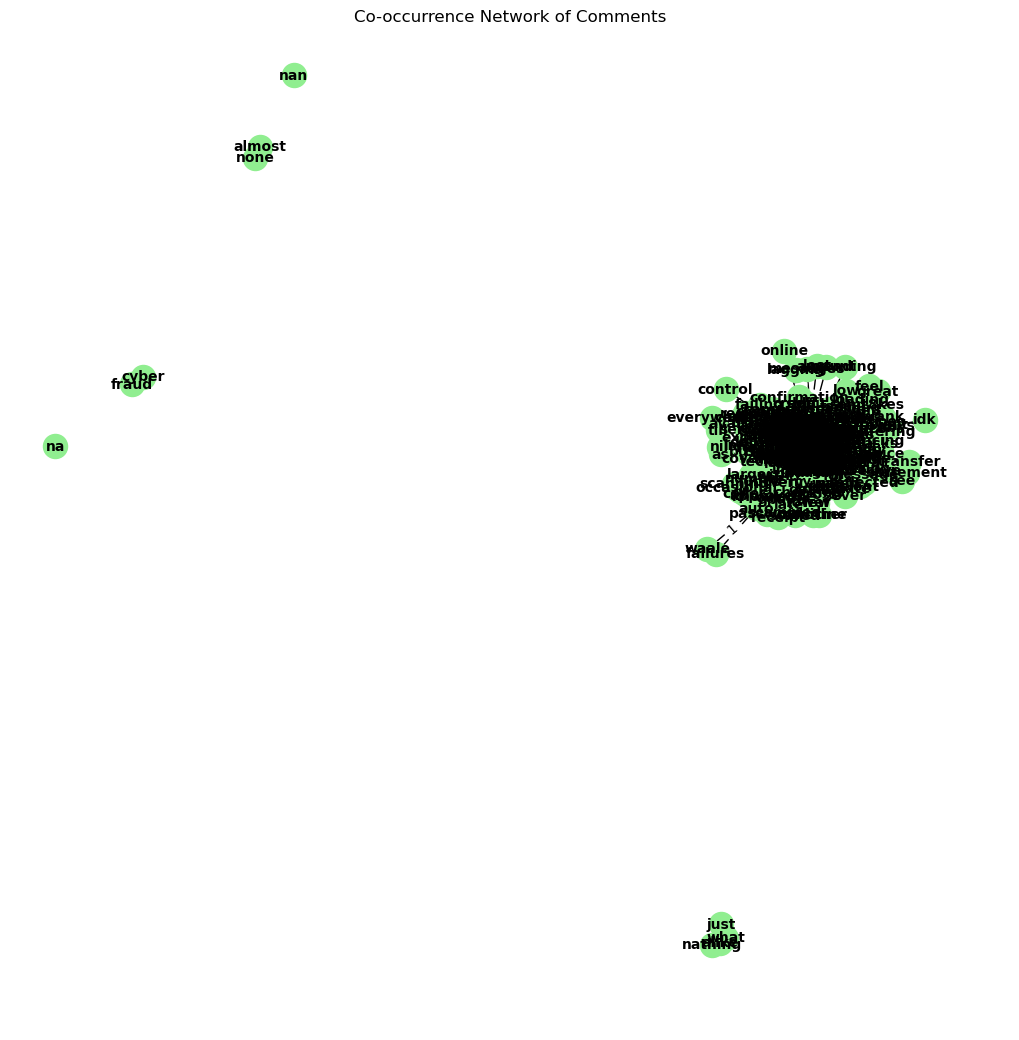

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
from networkx import Graph

df = pd.read_excel("Forms_data.xlsx")
df['Comments\n'] = df['Comments\n'].astype(str)

# Extract comments and drop any rows that are empty strings
comments = df['Comments\n'].dropna().tolist()

# Create a count matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(comments)
terms = vectorizer.get_feature_names_out()

# Create a co-occurrence matrix
co_occurrence = (X.T @ X).toarray()
np.fill_diagonal(co_occurrence, 0)  # Set the diagonal to 0 to remove self-loops

# Build the network
G = Graph()
for i in range(len(terms)):
    G.add_node(terms[i])

for i in range(len(terms)):
    for j in range(i + 1, len(terms)):
        if co_occurrence[i, j] > 0:
            G.add_edge(terms[i], terms[j], weight=co_occurrence[i, j])

# Draw the network
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightgreen', font_size=10, font_weight='bold')

# Draw edge labels for co-occurrence weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Co-occurrence Network of Comments')
plt.show()